# Benchmarking
This is a simple benchmarking notebook. It's the python version of the [ImageJ Macro original](https://clij.github.io/clij2-docs/md/benchmarking/)

Note: benchmarking results vary heavily depending on image size, kernel size, used operations, parameters and used hardware. Use this notebook to adapt it to your use-case scenario and benchmark on your target hardware. If you have different scenarios or use-cases, you are very welcome to submit your notebook as pull-request!

c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


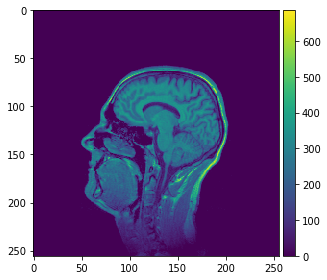

In [1]:
# load example data
from skimage.io import imread, imshow

image = imread('../data/t1-head.tif')

imshow(image[60])

# Mean-3D Filter in scikit-image

Mean-3D Filter on the CPU took 39002.588510513306 ms
Mean-3D Filter on the CPU took 39677.21509933472 ms
Mean-3D Filter on the CPU took 40607.42735862732 ms
Mean-3D Filter on the CPU took 40414.51358795166 ms
Mean-3D Filter on the CPU took 40231.78720474243 ms
Mean-3D Filter on the CPU took 40201.63941383362 ms
Mean-3D Filter on the CPU took 40506.40845298767 ms
Mean-3D Filter on the CPU took 45308.33911895752 ms
Mean-3D Filter on the CPU took 40420.29070854187 ms
Mean-3D Filter on the CPU took 41102.88405418396 ms


c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


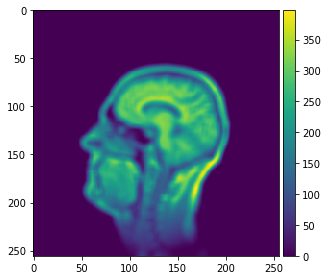

In [2]:
from skimage.morphology import cube
from skimage.filters.rank import mean
import time

structuring_element = cube(7)

output = None
for i in range(0, 10):
    start_time = time.time()
    output = mean(image, structuring_element, out=output)
    print("Mean-3D Filter on the CPU took " + str((time.time() - start_time) * 1000) + " ms")

imshow(output[60])

## Mean-3D Filter in py-clEsperanto

In [3]:
import pyclesperanto_prototype as cle

cle.select_device('RTX')

<GeForce RTX 2070 on Platform: NVIDIA CUDA (1 refs)>

Pushing one image to GPU memory took 50.698280334472656 ms
Mean-3D Filter on the GPU took 28.85603904724121 ms
Mean-3D Filter on the GPU took 7.78651237487793 ms
Mean-3D Filter on the GPU took 7.0514678955078125 ms
Mean-3D Filter on the GPU took 6.702184677124023 ms
Mean-3D Filter on the GPU took 8.126020431518555 ms
Mean-3D Filter on the GPU took 8.288383483886719 ms
Mean-3D Filter on the GPU took 9.006738662719727 ms
Mean-3D Filter on the GPU took 8.731365203857422 ms
Mean-3D Filter on the GPU took 8.640766143798828 ms
Mean-3D Filter on the GPU took 8.568525314331055 ms
Pulling one image from GPU memory took 28.923988342285156 ms


c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


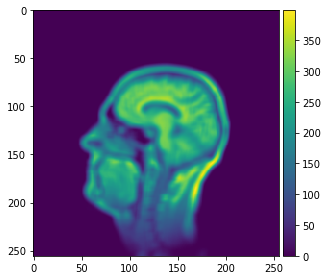

In [4]:
start_time = time.time()
image_gpu = cle.push_zyx(image)
print("Pushing one image to GPU memory took " + str((time.time() - start_time) * 1000) + " ms")

output_gpu = None
for i in range(0, 10):
    start_time = time.time()
    output_gpu = cle.mean_box(image_gpu, output_gpu, 3, 3, 3)
    print("Mean-3D Filter on the GPU took " + str((time.time() - start_time) * 1000) + " ms")

start_time = time.time()
output = cle.pull_zyx(output_gpu)
print("Pulling one image from GPU memory took " + str((time.time() - start_time) * 1000) + " ms")

imshow(output[60])

## Mean-3D Filter in py-clEsperanto using convolution

Preparing the convolution kernel in GPU memory took 6.545543670654297 ms
Mean-3D Filter using convolution on the GPU took 6.323575973510742 ms
Mean-3D Filter using convolution on the GPU took 1.0569095611572266 ms
Mean-3D Filter using convolution on the GPU took 0.9918212890625 ms
Mean-3D Filter using convolution on the GPU took 0.9899139404296875 ms
Mean-3D Filter using convolution on the GPU took 0.9951591491699219 ms
Mean-3D Filter using convolution on the GPU took 0.0 ms
Mean-3D Filter using convolution on the GPU took 0.9653568267822266 ms
Mean-3D Filter using convolution on the GPU took 0.0 ms
Mean-3D Filter using convolution on the GPU took 0.0 ms
Mean-3D Filter using convolution on the GPU took 0.9977817535400391 ms
Pulling one image from GPU memory took 249.36413764953613 ms


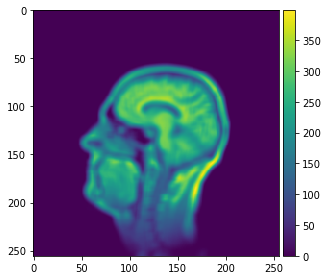

In [5]:
start_time = time.time()
structuring_element = cle.create([7, 7, 7]) # 2 x 3 + 1
cle.set(structuring_element, 1. / 7 / 7 / 7)
print("Preparing the convolution kernel in GPU memory took " + str((time.time() - start_time) * 1000) + " ms")


output_gpu = None
for i in range(0, 10):
    start_time = time.time()
    output_gpu = cle.convolve(image_gpu, structuring_element, output_gpu)
    print("Mean-3D Filter using convolution on the GPU took " + str((time.time() - start_time) * 1000) + " ms")
    
start_time = time.time()
output = cle.pull_zyx(output_gpu)
print("Pulling one image from GPU memory took " + str((time.time() - start_time) * 1000) + " ms")

imshow(output[60])